Add starting instructions here - how to use Sentinal Hub to choose an area to investigate.<br>
Use NDVI to see crop health.<br>
In the demo, I have used an image of South Oxford.

Following: https://matplotlib.org/stable/tutorials/images.html

In [1]:
# First, import all necessary libraries
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

Instructions on how to upload your own image into this Notebook...<br>
For now, use the demo image.<br>
<br>
Open the image from the file system, and confirm its format, size and mode.<br>
It should be JPEG or PNG, and in RGB mode.

In [2]:
original = Image.open("Landsat_NDVI.jpg")
original.format, original.size, original.mode

('JPEG', (1536, 703), 'RGB')

Use Numpy to convert the image data into an array, containing information about all pixels.<br>
Confirm its shape (should be the same size as it was before, and have 3 pieces of information (RGB)).<br>
Confirm its data type, it should be uint8.

In [3]:
np_img = np.asarray(original)
np_img.shape, np_img.dtype

((703, 1536, 3), dtype('uint8'))

Plot the image using MatPlotLib - this should initially look the same as the original file you downloaded, but with axis.

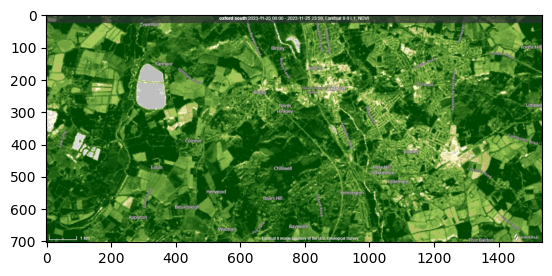

In [4]:
plt.imshow(np_img)

Use Numpy to convert the image into a luminosity image - the colour is determined by the brightness/depth of the colour, ignoring whether it is red green or blue.<br>
This works for our images in NDVI format, as they have been pre-processed in this way.
Plot this new image using MatPlotLib, it will change colour but otherwise be very similar.

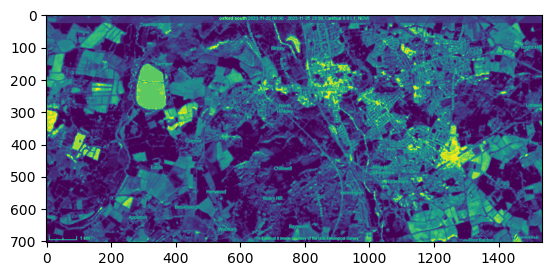

In [5]:
lum_img = np_img[:, :, 0]
plt.imshow(lum_img)

You can map the colours in other ways, to get a map that you are happy with.<br>
What colours do you think would be best to present your data?<br>
<br>
First, get a list of all the colour map options.

In [6]:
list(plt.colormaps)

['magma',
 'inferno',
 'plasma',
 'viridis',
 'cividis',
 'twilight',
 'twilight_shifted',
 'turbo',
 'Blues',
 'BrBG',
 'BuGn',
 'BuPu',
 'CMRmap',
 'GnBu',
 'Greens',
 'Greys',
 'OrRd',
 'Oranges',
 'PRGn',
 'PiYG',
 'PuBu',
 'PuBuGn',
 'PuOr',
 'PuRd',
 'Purples',
 'RdBu',
 'RdGy',
 'RdPu',
 'RdYlBu',
 'RdYlGn',
 'Reds',
 'Spectral',
 'Wistia',
 'YlGn',
 'YlGnBu',
 'YlOrBr',
 'YlOrRd',
 'afmhot',
 'autumn',
 'binary',
 'bone',
 'brg',
 'bwr',
 'cool',
 'coolwarm',
 'copper',
 'cubehelix',
 'flag',
 'gist_earth',
 'gist_gray',
 'gist_heat',
 'gist_ncar',
 'gist_rainbow',
 'gist_stern',
 'gist_yarg',
 'gnuplot',
 'gnuplot2',
 'gray',
 'hot',
 'hsv',
 'jet',
 'nipy_spectral',
 'ocean',
 'pink',
 'prism',
 'rainbow',
 'seismic',
 'spring',
 'summer',
 'terrain',
 'winter',
 'Accent',
 'Dark2',
 'Paired',
 'Pastel1',
 'Pastel2',
 'Set1',
 'Set2',
 'Set3',
 'tab10',
 'tab20',
 'tab20b',
 'tab20c',
 'magma_r',
 'inferno_r',
 'plasma_r',
 'viridis_r',
 'cividis_r',
 'twilight_r',
 'twilight

Choose one to start with. For example 'hot'.

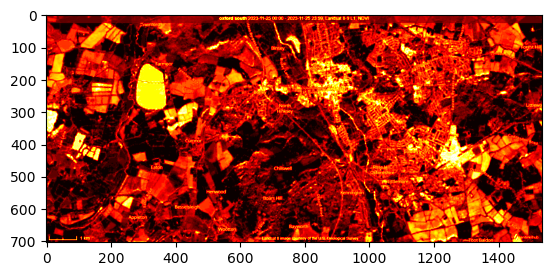

In [7]:
plt.imshow(lum_img, cmap='hot')

Now add a key.

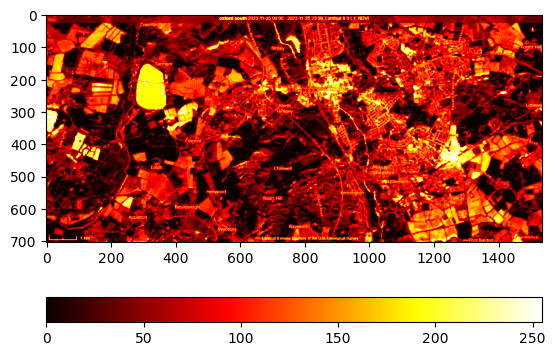

In [8]:
plt.imshow(lum_img, cmap='hot')
plt.colorbar(orientation='horizontal')

Label, add a title etc.

Text(0.5, 1.0, 'NDVI map of Oxford')

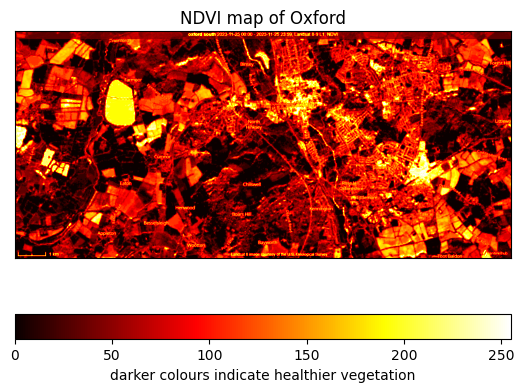

In [9]:
plt.imshow(lum_img, cmap='hot')
plt.colorbar(orientation='horizontal', label='darker colours indicate healthier vegetation')
plt.xticks([])
plt.yticks([])
plt.title('NDVI map of Oxford')

Plot a histagram of the image, to see which colours are the most prominant.

(array([100158.,  25235.,  26530.,  17758.,  12879.,   9595.,   6791.,
          4959.,   3331.,   2826.,   2692.,   3278.,   4410.,   6062.,
          8475.,  10665.,  12543.,  12001.,  10289.,   8427.,   6819.,
          5102.,   4014.,   3213.,   2552.,   2496.,   2728.,   3613.,
          5049.,   6685.,   8633.,  11792.,  13651.,  14075.,  12273.,
         10802.,   8831.,   7138.,   5503.,   4526.,   4383.,   4247.,
          4706.,   5438.,   7162.,   8767.,  10722.,  12167.,  12581.,
         11862.,  10221.,   8642.,   6893.,   5519.,   4542.,   3998.,
          3653.,   3586.,   3813.,   4744.,   5575.,   6657.,   7996.,
          9302.,   9718.,  10072.,   9432.,   8309.,   7317.,   6137.,
          5020.,   4521.,   3995.,   4082.,   4507.,   5280.,   6023.,
          7132.,   7878.,   8635.,   8300.,   7832.,   6868.,   5800.,
          5037.,   4045.,   3622.,   3205.,   3193.,   3410.,   3882.,
          4656.,   5359.,   6211.,   7001.,   7727.,   7846.,   6744.,
      

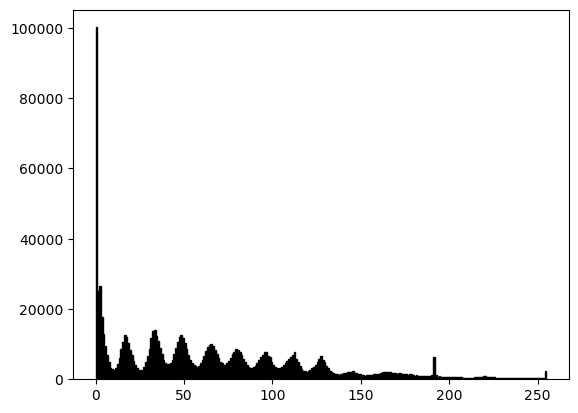

In [10]:
plt.hist(lum_img.ravel(), bins=range(256), fc='k', ec='k')

You can see that most of the data is concentrated at the beginning of the scale.<br>
0 is the darkest parts, the part that shows the most organic matter / healthiest vegetation.<br>
<br>
You could, for example, plot a graph of just the first part of this histogram, to focus in on the healthy vegetation and ignoring the rest.

Text(0.5, 1.0, 'NDVI map of Oxford')

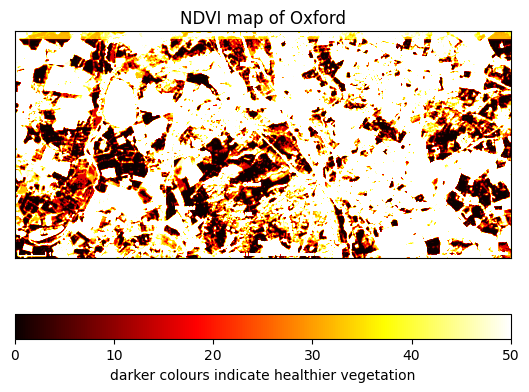

In [11]:
plt.imshow(lum_img, clim=(0, 50), cmap='hot')
plt.colorbar(orientation='horizontal', label='darker colours indicate healthier vegetation')
plt.xticks([])
plt.yticks([])
plt.title('NDVI map of Oxford')

Or the opposite, to highlight the built-up areas and merge all of the 'mostly healthy' vegetation together.

Text(0.5, 1.0, 'NDVI map of Oxford')

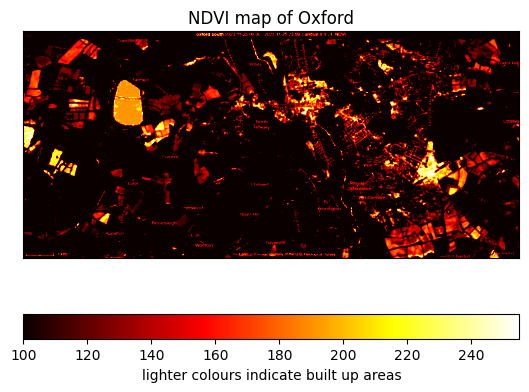

In [12]:
plt.imshow(lum_img, clim=(100, 255), cmap='hot')
plt.colorbar(orientation='horizontal', label='lighter colours indicate built up areas')
plt.xticks([])
plt.yticks([])
plt.title('NDVI map of Oxford')